In [14]:
import pandas as pd 
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [16]:
df.index = df['Month']
del df['Month']
df['Passengers'] = df['#Passengers']
del df['#Passengers']
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


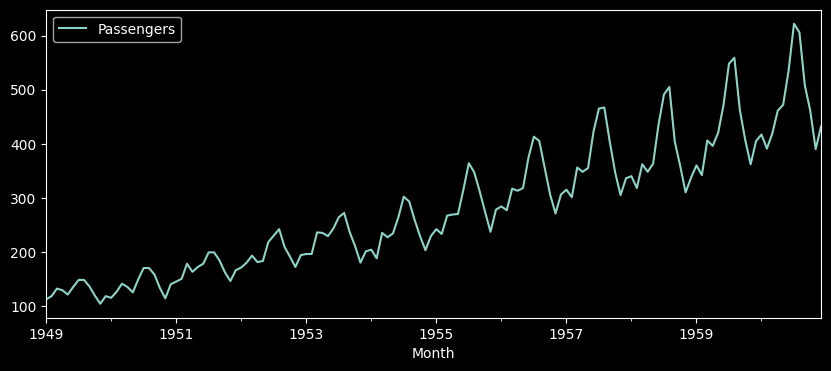

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('dark_background')
df.plot(figsize=(10,4));

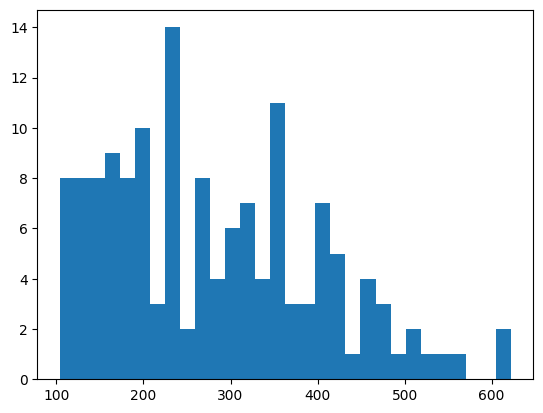

In [28]:
plt.style.use('default')
plt.hist(df["Passengers"], bins=30);

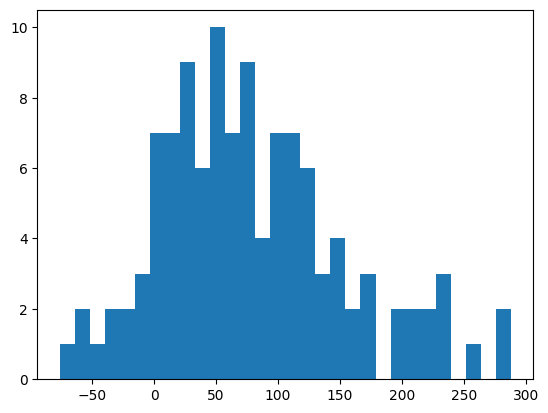

In [29]:
plt.hist(df["Passengers"].diff(30), bins=30);

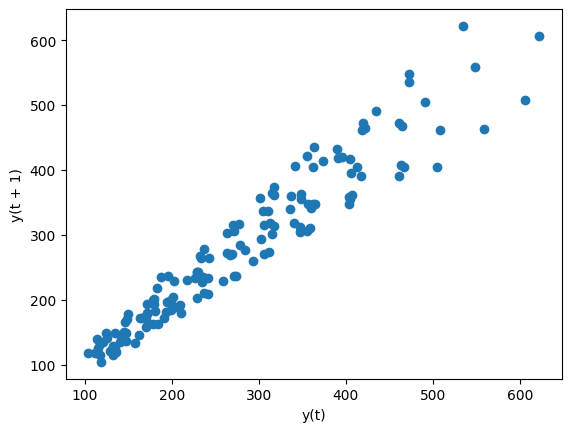

In [23]:
pd.plotting.lag_plot(df['Passengers']);

In [31]:
import numpy as np

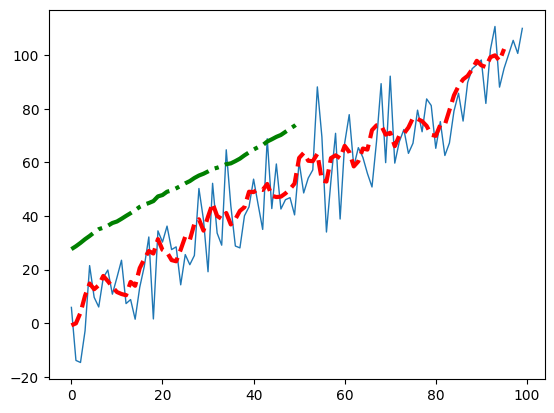

In [32]:
# Generate the x values
x = np.random.normal(0, 10, 100) + np.arange(1, 101)

def mn(n):
    return np.repeat(1/n, n)

# Plot the x values as a line
plt.plot(x, '-', linewidth=1)

# Plot the filtered x values with a moving average of 5
plt.plot(np.convolve(x, mn(5), mode='valid'), '--', color='red', linewidth=3)

# Plot the filtered x values with a moving average of 50
plt.plot(np.convolve(x, mn(50), mode='valid'), '-.', color='green', linewidth=3);

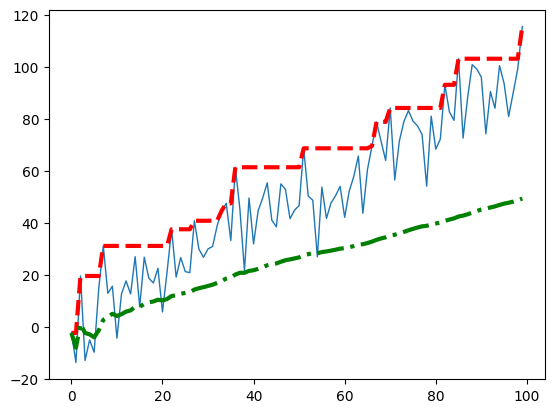

In [33]:
# Generate the x values
x = np.random.normal(0, 10, 100) + np.arange(1, 101)

# Plot the x values as a line
plt.plot(x, '-', linewidth=1)

# Plot the cumulative max of the x values
plt.plot(np.maximum.accumulate(x), '--', color='red', linewidth=3)

# Plot the cumulative mean of the x values
plt.plot(np.cumsum(x) / np.arange(1, 101), '-.', color='green', linewidth=3);

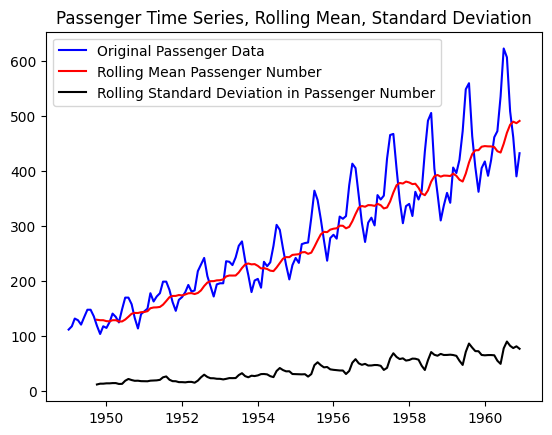

In [34]:
# calculating a 10-month rolling mean and rolling standard deviation 
rolling_mean = df.rolling(10).mean()
rolling_std = df.rolling(10).std()

plt.plot(df, color="blue",label="Original Passenger Data")

plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number") # plotting the rolling mean

plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number") # plotting the rolling standard deviation

plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best");

In [37]:
from statsmodels.tsa.stattools import adfuller # importing ADF test

adft = adfuller(df,autolag="AIC")

In [38]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']], 
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

output_df

,Values,Metric
0,0.815369,Test Statistics
1,0.991880,p-value
2,13.000000,No. of lags used
3,130.000000,Number of observations used
4,-3.481682,critical value (1%)
5,-2.884042,critical value (5%)
6,-2.578770,critical value (10%)


In [41]:
autocorrelation_lag1 = df['Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = df['Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['Passengers'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['Passengers'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.9601946480498523
Three Month Lag:  0.837394765081794
Six Month Lag:  0.7839187959206183
Nine Month Lag:  0.8278519011167601


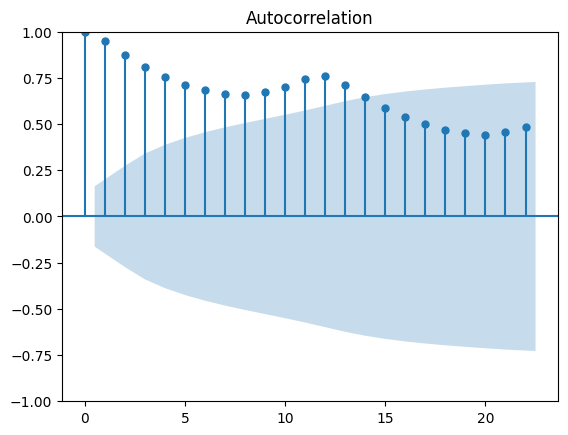

In [42]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df.Passengers);

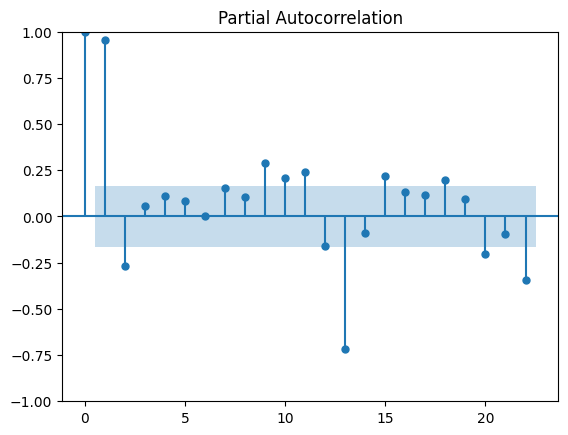

In [44]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df.Passengers);

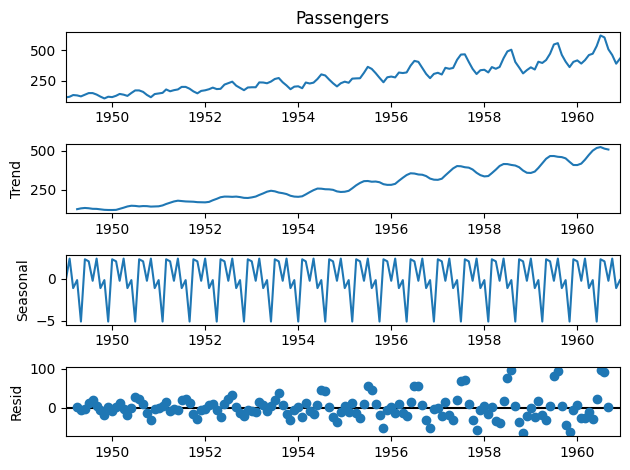

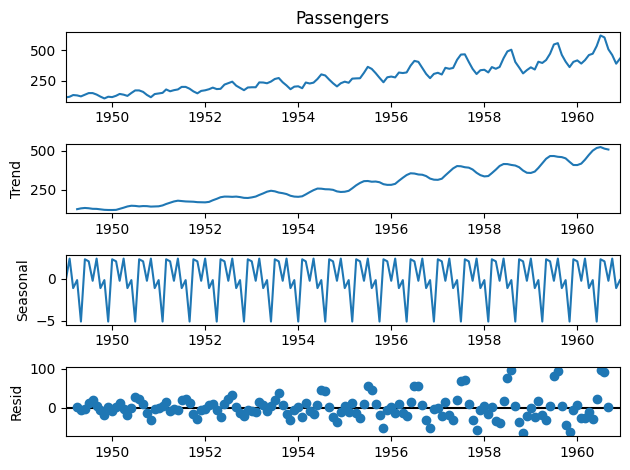

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['Passengers'],model='additive', period=7)
decompose.plot()